# Classification using autoencoder using the MNIST dataset

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
import time

In [24]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [27]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [28]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [29]:
# n.prod multiply 28 x 28 = 784
X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
X_train.shape

(60000, 784)

In [30]:
# 784 input, 32 redution , 784 output
factor_compact = 784/32
autoencoder = Sequential()
autoencoder.add(Dense(32,activation='relu',input_shape=(784,)))
autoencoder.add(Dense(784,activation='sigmoid'))
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',
                    metrics=['accuracy'])
early = keras.callbacks.EarlyStopping(monitor='loss',
                                         patience=2,
                                         min_delta=0.001,
                                         mode='auto',
                                         restore_best_weights=True
                                         )
autoencoder.fit(X_train,X_train,epochs=50,batch_size=256,
                shuffle=True,validation_data=(X_test,X_test),callbacks=[early])

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.0091 - loss: 0.3840 - val_accuracy: 0.0137 - val_loss: 0.1922
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0138 - loss: 0.1816 - val_accuracy: 0.0112 - val_loss: 0.1527
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0116 - loss: 0.1487 - val_accuracy: 0.0091 - val_loss: 0.1334
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0098 - loss: 0.1309 - val_accuracy: 0.0102 - val_loss: 0.1211
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0097 - loss: 0.1197 - val_accuracy: 0.0107 - val_loss: 0.1129
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0100 - loss: 0.1125 - val_accuracy: 0.0112 - val_loss: 0.1066
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0101 - loss: 0.1066 - val_accuracy: 0.0112 - val_loss: 0.1023
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0100 - loss: 0.1027 - val_accurac

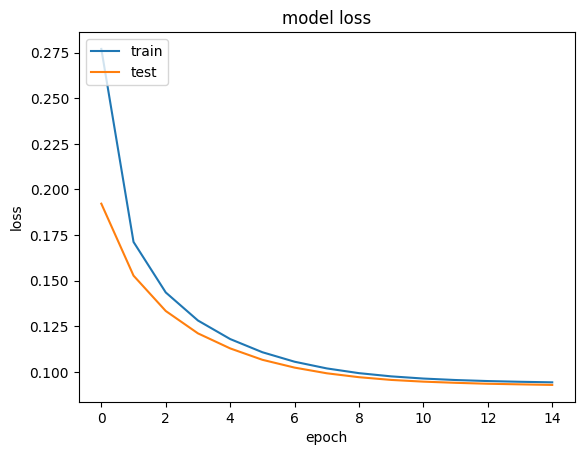

In [31]:
# prompt: create a graph to compare loss e val_loss in the time

import matplotlib.pyplot as plt
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [32]:
origin_dim = Input(shape=(784,))
layer_encoder = autoencoder.layers[0]
encoder = Model(origin_dim,layer_encoder(origin_dim))
encoder.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │          25,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
encoder_image = encoder.predict(X_train)
encoder_image_teste = encoder.predict(X_test)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [34]:
# resctrict number for probability in output for 10 class
class_train = to_categorical(y_train, 10)
class_test = to_categorical(y_test, 10)
class_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [35]:
print(encoder_image.shape)
print(X_train.shape)


(60000, 32)
(60000, 784)


# Model without autoencoder

In [37]:
start_time = time.time()
c1 = Sequential()
# (784 dimensions + 10 output) / 2
c1.add(Dense(units = 397,activation='relu',input_shape=(784,)))
c1.add(Dense(units = 397,activation='relu'))
# output layer
c1.add(Dense(units = 10,activation='softmax'))
c1.compile(optimizer='adam',loss='categorical_crossentropy',
            metrics=['accuracy'])
c1.fit(X_train,class_train,epochs=100,batch_size=256,
        shuffle=True,validation_data=(X_test,class_test))
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8521 - loss: 0.5284 - val_accuracy: 0.9604 - val_loss: 0.1305
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9668 - loss: 0.1115 - val_accuracy: 0.9690 - val_loss: 0.0973
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9807 - loss: 0.0638 - val_accuracy: 0.9764 - val_loss: 0.0741
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9873 - loss: 0.0419 - val_accuracy: 0.9790 - val_loss: 0.0632
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9906 - loss: 0.0303 - val_accuracy: 0.9797 - val_loss: 0.0678
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9938 - loss: 0.0195 - val_accuracy: 0.9807 - val_loss: 0.0657
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9950 - loss: 0.0166 - val_accuracy: 0.9804 - val_loss: 0.0717
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9955 - loss: 0.0148 - 

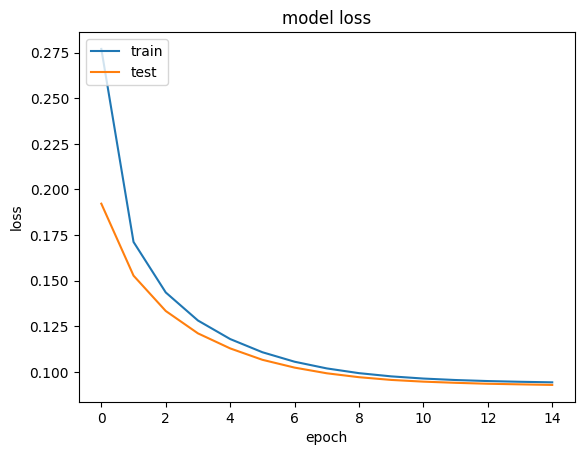

In [38]:
import matplotlib.pyplot as plt
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Classification using dimension reduction with Autoencode

In [39]:
# encode image
print(encoder_image.shape)
print(encoder_image_teste.shape)



(60000, 32)
(10000, 32)


In [40]:
start_time = time.time()
c2 = Sequential()
# (32 input / 10 output) /2 = 21
c2.add(Dense(units = 21,activation='relu',input_shape=(32,)))
c2.add(Dense(units = 21,activation='relu'))
# output layer
c2.add(Dense(units = 10,activation='softmax'))
c2.compile(optimizer='adam',loss='categorical_crossentropy',
            metrics=['accuracy'])
c2.fit(encoder_image,class_train,epochs=100,batch_size=256,
        shuffle=True,validation_data=(encoder_image_teste,class_test))
end_time = time.time()

training_time = end_time - start_time
print("Training time using Autoencoder: {:.2f} seconds".format(training_time))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2460 - loss: 4.1112 - val_accuracy: 0.6105 - val_loss: 1.2036
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6597 - loss: 1.0647 - val_accuracy: 0.7897 - val_loss: 0.6728
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8108 - loss: 0.6260 - val_accuracy: 0.8557 - val_loss: 0.4876
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8542 - loss: 0.4839 - val_accuracy: 0.8781 - val_loss: 0.4205
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8764 - loss: 0.4220 - val_accuracy: 0.8866 - val_loss: 0.3860
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8842 - loss: 0.3888 - val_accuracy: 0.8953 - val_loss: 0.3550
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8925 - loss: 0.3638 - val_accuracy: 0.9034 - val_loss: 0.3262
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8990 - loss: 0.3432 - val_accu

Using autoencode and stop early

In [41]:
start_time = time.time()
c2.fit(encoder_image,class_train,epochs=100,batch_size=256,
        shuffle=True,validation_data=(encoder_image_teste,class_test), callbacks=[early])
end_time = time.time()
training_time = end_time - start_time
print("Training time using Autoencoder: {:.2f} seconds".format(training_time))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9608 - loss: 0.1283 - val_accuracy: 0.9608 - val_loss: 0.1392
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9599 - loss: 0.1291 - val_accuracy: 0.9580 - val_loss: 0.1420
Training time using Autoencoder: 1.34 seconds
